## Etude des hyperparamètres

In [24]:
import numpy as np
from src.RBM_model import RBM
from src.load_dataset import lire_alpha_digit, get_image_size
import matplotlib.pyplot as plt
from src.generate import generer_image_RBM, display_images

### 1. Importer les données

In [2]:
# Importer les données
X = lire_alpha_digit(['A'])

### 2. Nombre d'unités cachése

In [3]:
p = X.shape[1]
lr = 0.01
batch_size = 10
epochs = 2000
q = [1, 50, 100, 300, 1000, 10000]

In [4]:
history_list, weights_list, free_energy_list, weight_snapshots_list, gradients_list, avg_activations_list, hidden_probs_snapshots_list = ([] for _ in range(7))
rbm_list = []

In [5]:
for q_ in q:
    rbm = RBM(p, q_)
    rbm_list.append(rbm)
    history, weights, free_energy, weight_snapshots, gradients, avg_activations, hidden_probs_snapshots = rbm.train_RBM(X, learning_rate=lr, batch_size=batch_size, epochs=epochs)
    history_list.append(history)
    weights_list.append(weights)
    free_energy_list.append(free_energy)
    weight_snapshots_list.append(weight_snapshots)
    gradients_list.append(gradients)
    avg_activations_list.append(avg_activations)
    hidden_probs_snapshots_list.append(hidden_probs_snapshots)

100%|██████████| 2000/2000 [04:08<00:00,  8.04it/s]


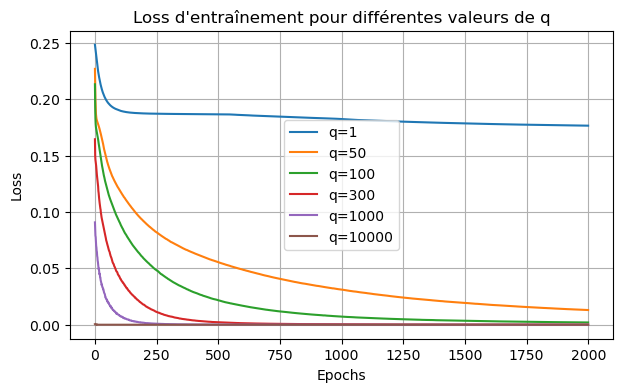

In [6]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(history_list):
    plt.plot(history, label=f'q={q[i]}')
plt.title('Loss d\'entraînement pour différentes valeurs de q')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

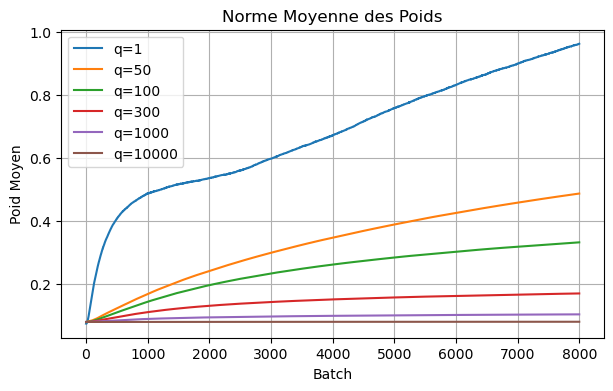

In [7]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(weights_list):
    plt.plot(history, label=f'q={q[i]}')
plt.title('Norme Moyenne des Poids')
plt.xlabel('Batch')
plt.ylabel('Poid Moyen')
plt.legend()
plt.grid(True)
plt.show()

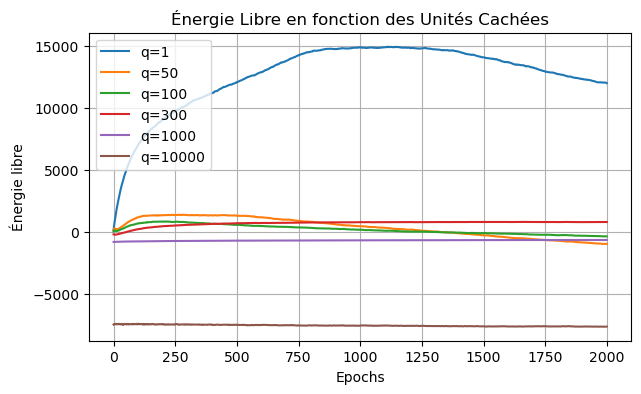

In [14]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(free_energy_list):
    plt.plot(history, label=f'q={q[i]}')
plt.title('Énergie Libre en fonction des Unités Cachées')
plt.xlabel('Epochs')
plt.ylabel('Énergie libre')
plt.legend()
plt.grid(True)
plt.show()

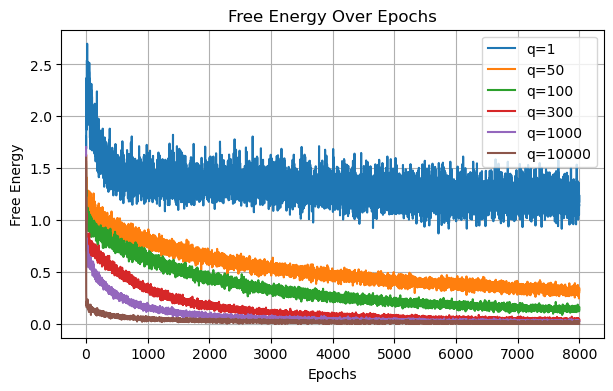

In [41]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(gradients_list):
    plt.plot(history, label=f'q={q[i]}')
plt.title('Free Energy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Free Energy')
plt.legend()
plt.grid(True)
plt.show()

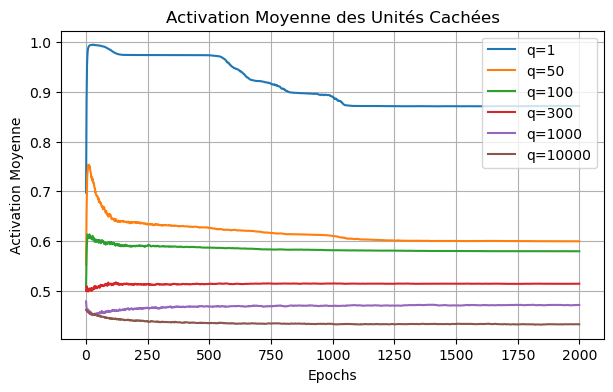

In [15]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(avg_activations_list):
    plt.plot(history, label=f'q={q[i]}')
plt.title('Activation Moyenne des Unités Cachées')
plt.xlabel('Epochs')
plt.ylabel('Activation Moyenne')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_4899/1179081631.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


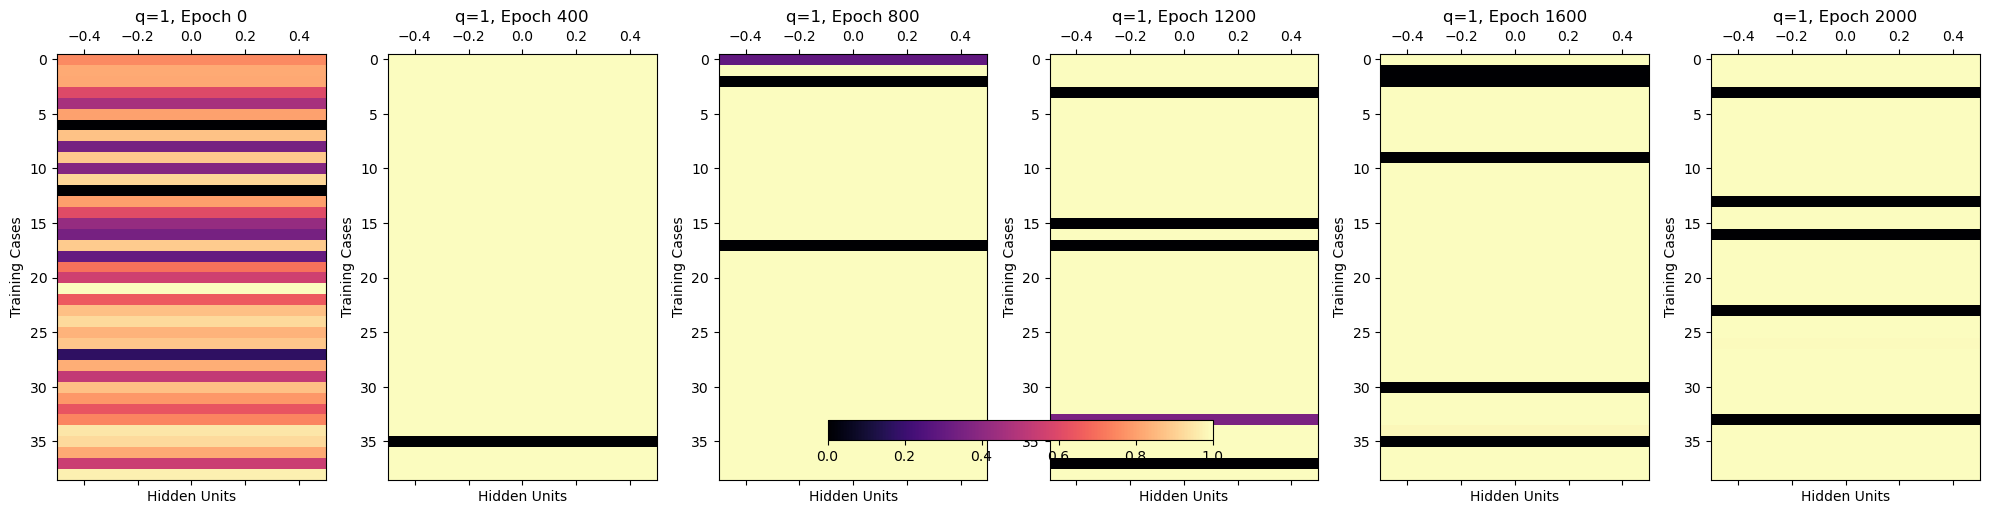

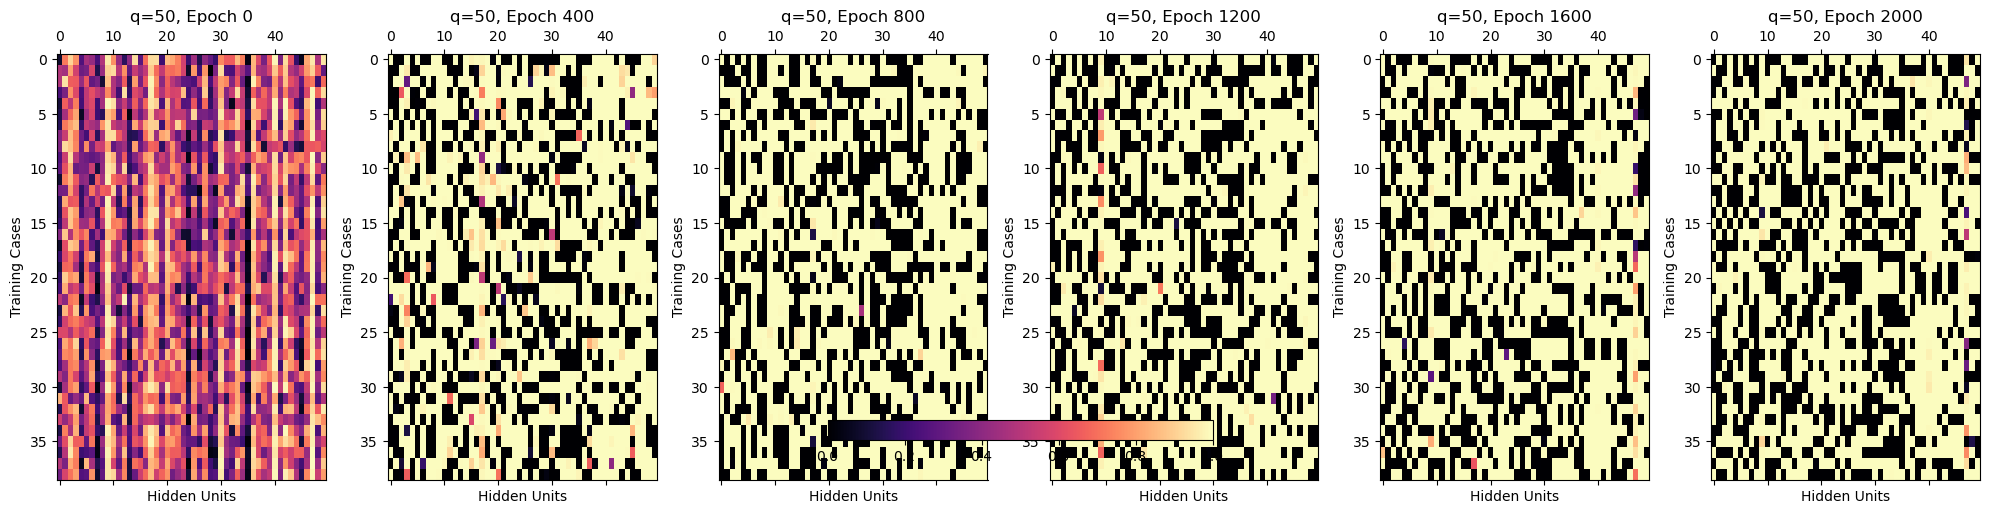

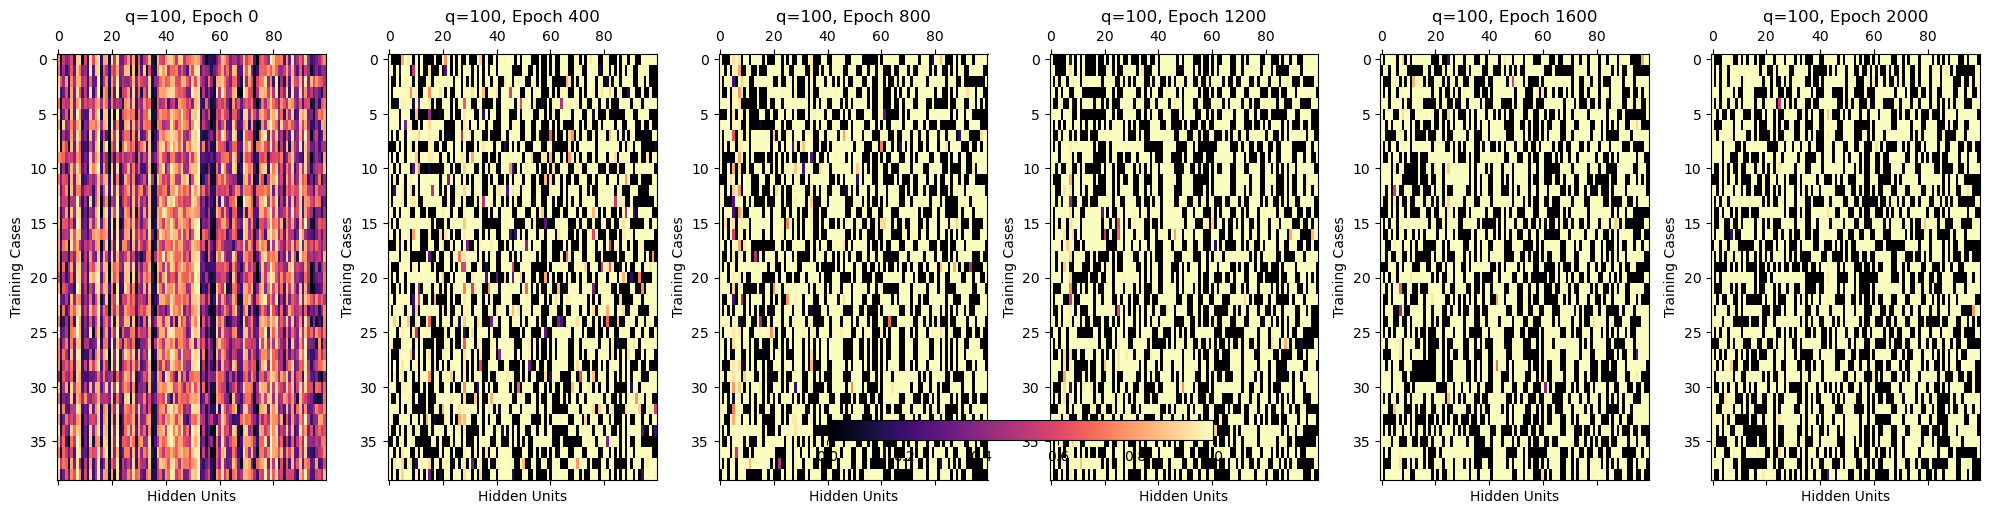

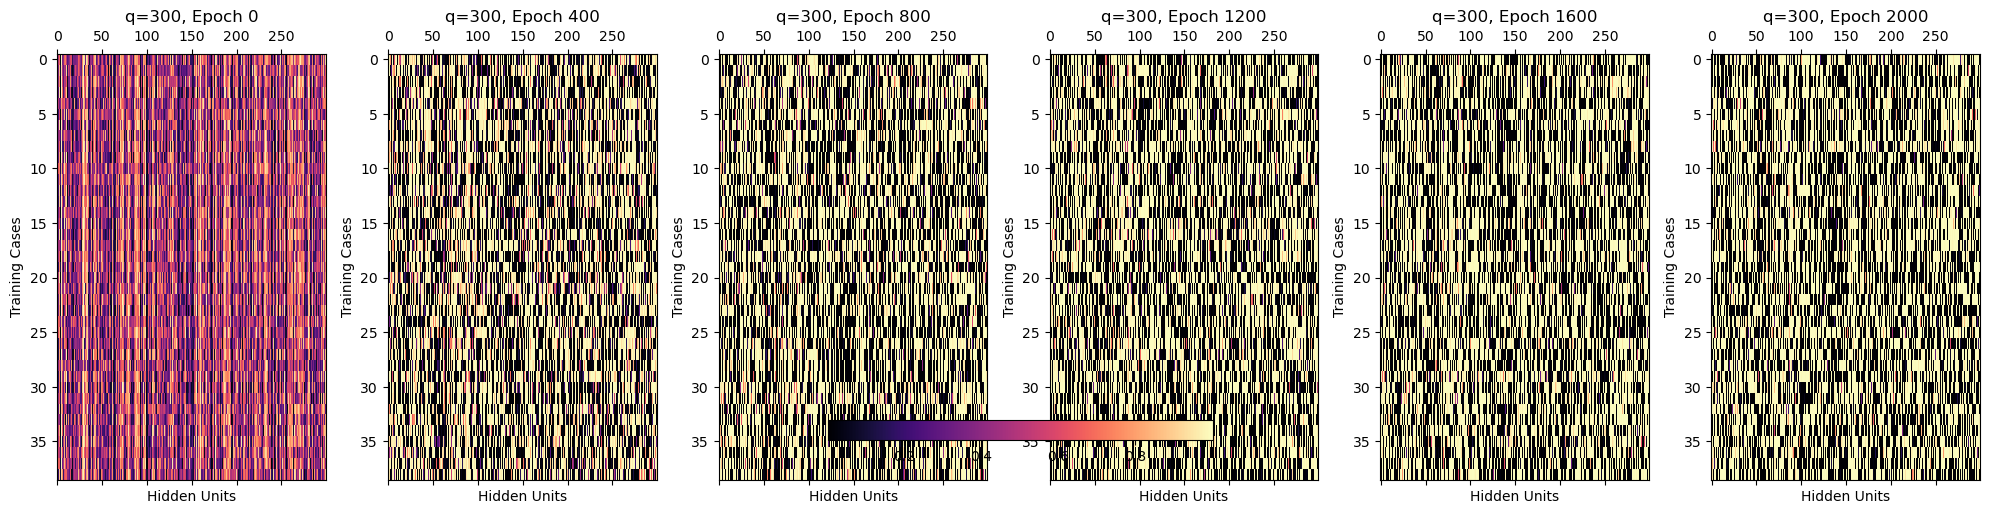

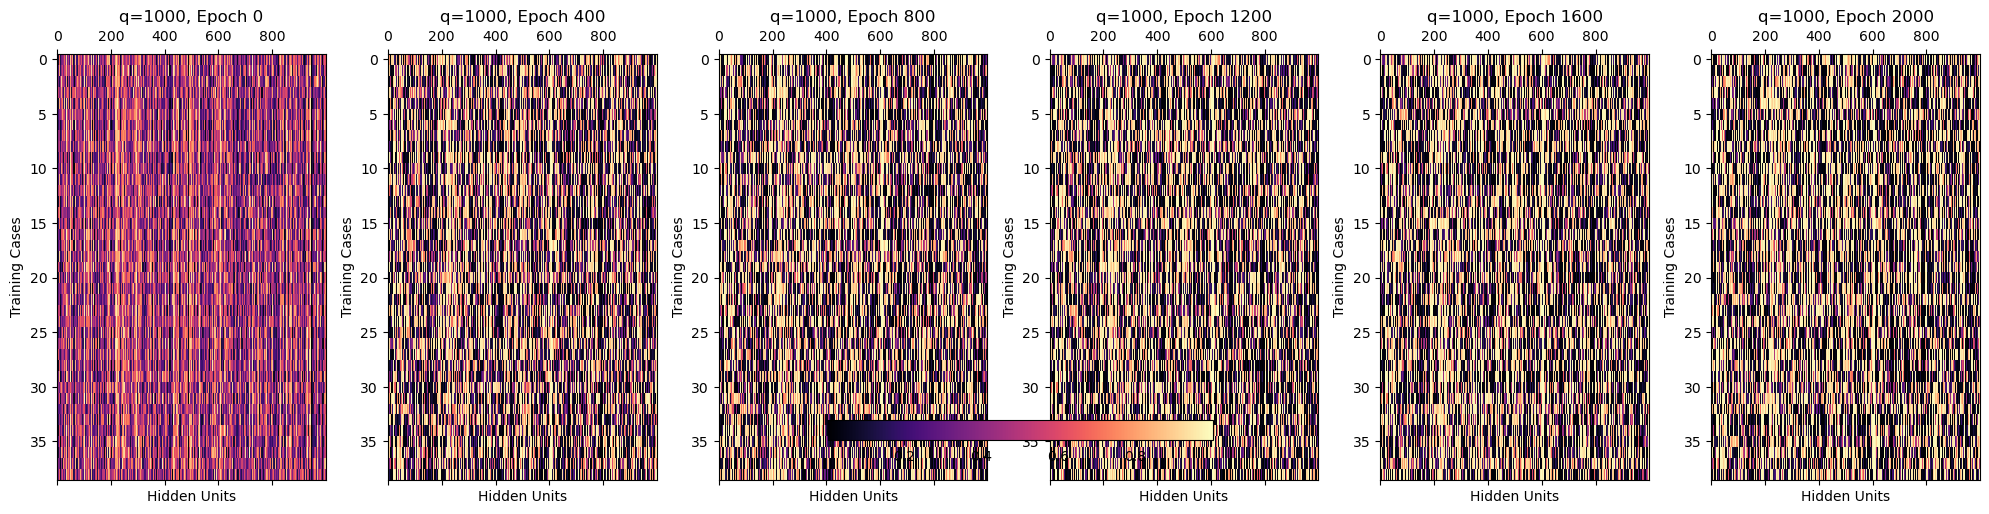

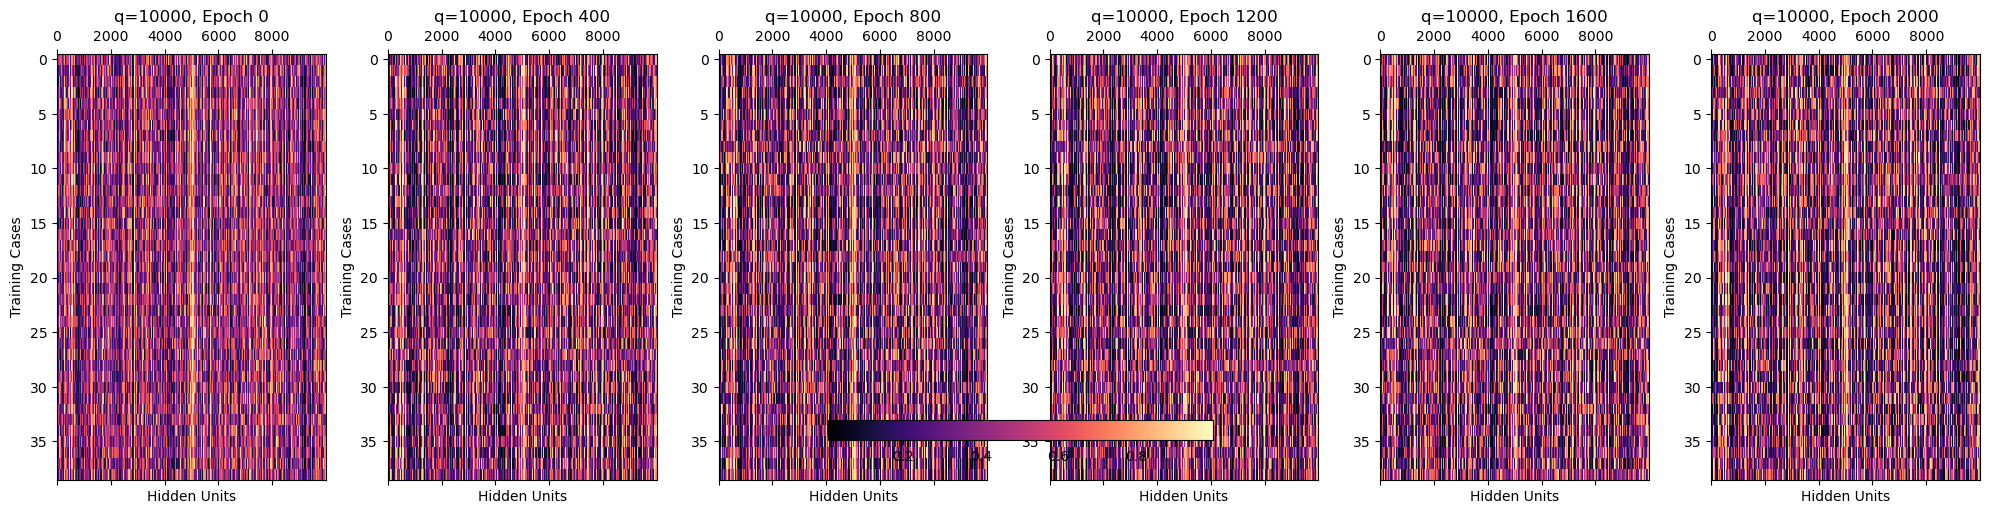

In [43]:
import matplotlib.pyplot as plt

for idx, hidden_probs_snapshots in enumerate(hidden_probs_snapshots_list):
    fig, axs = plt.subplots(1, len(hidden_probs_snapshots), figsize=(20, 5))
    for i, hidden_probs in enumerate(hidden_probs_snapshots):
        cax = axs[i].matshow(hidden_probs, cmap='magma', aspect='auto')
        axs[i].set_title(f'q={q[idx]}, Epoch {i*400}')
        axs[i].set_xlabel('Hidden Units')
        axs[i].set_ylabel('Training Cases')
    plt.colorbar(cax, ax=axs, orientation='horizontal', fraction=0.05)
    plt.tight_layout()
    plt.show()

In [108]:
all_images = []
for idx, rbm in enumerate(rbm_list):
    taille_image = get_image_size()
    images = generer_image_RBM(model=rbm, nb_images=4, nb_iter=200, size_img=taille_image)
    all_images.extend(images)  # Use extend to add all images to the list

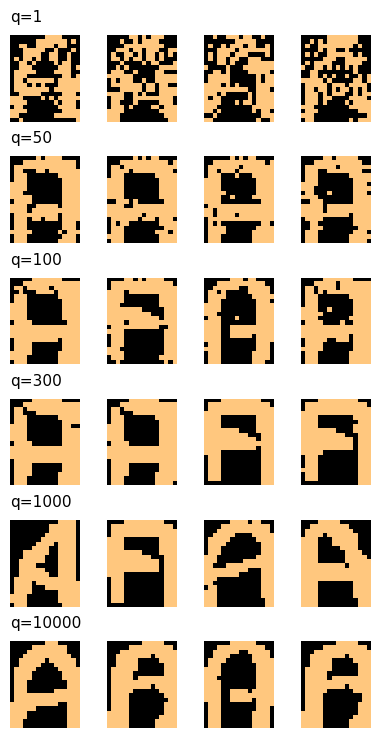

In [110]:

def plot_images_grid(images, rows, cols, labels, figsize=(5, 9), hspace=0.4, wspace=0.01):
    assert len(images) == rows * cols, "Number of images must match grid dimensions."
    assert len(labels) == rows, "Number of labels must match the number of rows."

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='copper')  # Change colormap as needed
        ax.axis('off')  # Turn off axis

        # Add label to the first column of each row
        if i % cols == 0:
            row_idx = i // cols
            ax.set_title(f'q={labels[row_idx]}', loc='left', fontsize=11, pad=10)

    plt.subplots_adjust(hspace=hspace, wspace=0)
    plt.show()

labels = [1, 50, 100, 300, 1000, 10000]
plot_images_grid(all_images, rows=6, cols=4, labels=labels)

 ### Taux d'appentistage

In [119]:
p = X.shape[1]
lr = [0.0001 ,0.001, 0.01, 0.1, 1]
batch_size = 10
epochs = 2000
q = 500

In [120]:
history_list, weights_list, free_energy_list, weight_snapshots_list, gradients_list, avg_activations_list, hidden_probs_snapshots_list = ([] for _ in range(7))
rbm_list = []

In [121]:
for _lr in lr:
    rbm = RBM(p, q)
    rbm_list.append(rbm)
    history, weights, free_energy, weight_snapshots, gradients, avg_activations, hidden_probs_snapshots = rbm.train_RBM(X, learning_rate=_lr, batch_size=batch_size, epochs=epochs)
    history_list.append(history)
    weights_list.append(weights)
    free_energy_list.append(free_energy)
    weight_snapshots_list.append(weight_snapshots)
    gradients_list.append(gradients)
    avg_activations_list.append(avg_activations)
    hidden_probs_snapshots_list.append(hidden_probs_snapshots)

100%|██████████| 2000/2000 [00:39<00:00, 51.19it/s]


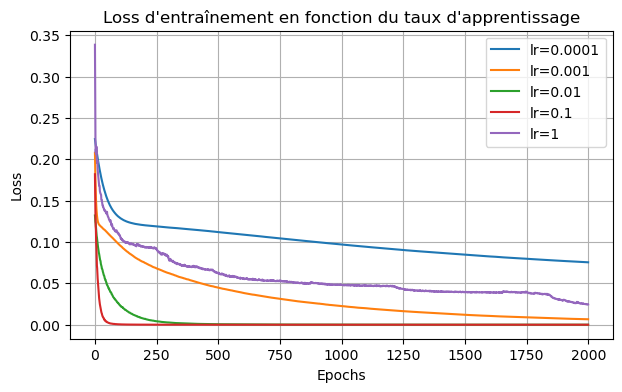

In [124]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(history_list):
    plt.plot(history, label=f'lr={lr[i]}')
plt.title('Loss d\'entraînement en fonction du taux d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

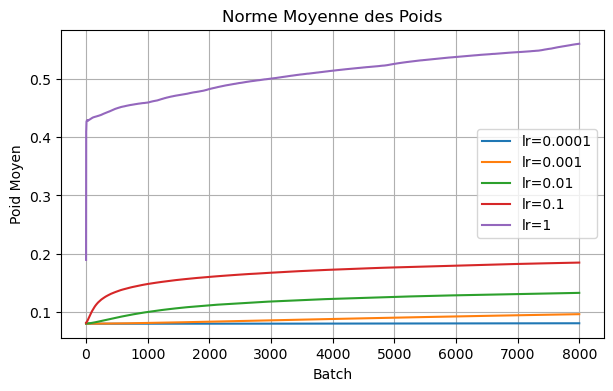

In [125]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(weights_list):
    plt.plot(history, label=f'lr={lr[i]}')
plt.title('Norme Moyenne des Poids')
plt.xlabel('Batch')
plt.ylabel('Poid Moyen')
plt.legend()
plt.grid(True)
plt.show()

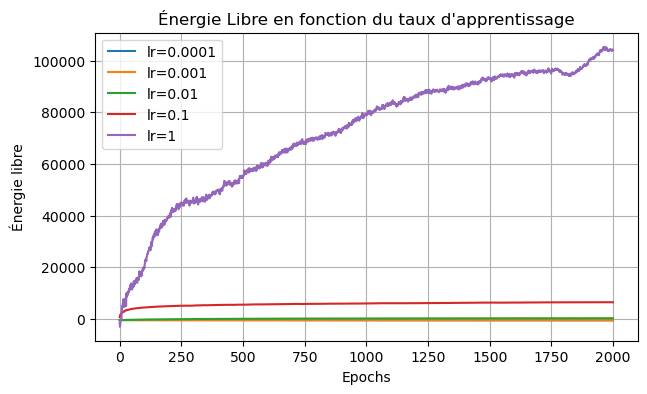

In [126]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(free_energy_list):
    plt.plot(history, label=f'lr={lr[i]}')
plt.title('Énergie Libre en fonction du taux d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Énergie libre')
plt.legend()
plt.grid(True)
plt.show()

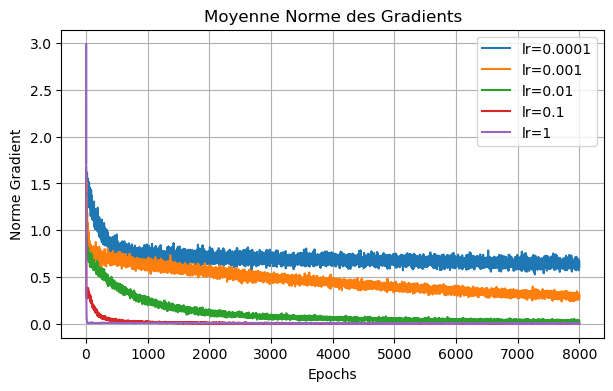

In [143]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(gradients_list):
    plt.plot(history, label=f'lr={lr[i]}')
plt.title('Moyenne Norme des Gradients')
plt.xlabel('Epochs')
plt.ylabel('Norme Gradient')
plt.legend()
plt.grid(True)
plt.show()

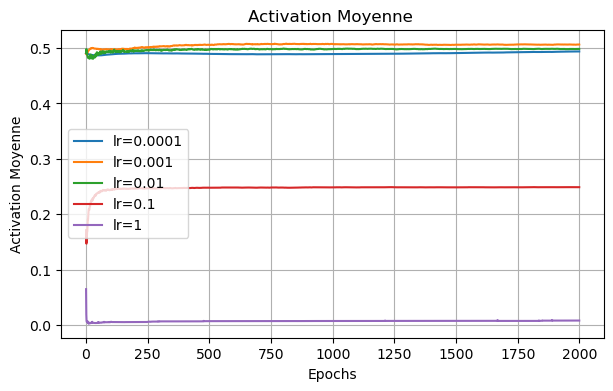

In [144]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(avg_activations_list):
    plt.plot(history, label=f'lr={lr[i]}')
plt.title('Activation Moyenne ')
plt.xlabel('Epochs')
plt.ylabel('Activation Moyenne')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_5268/2135648544.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


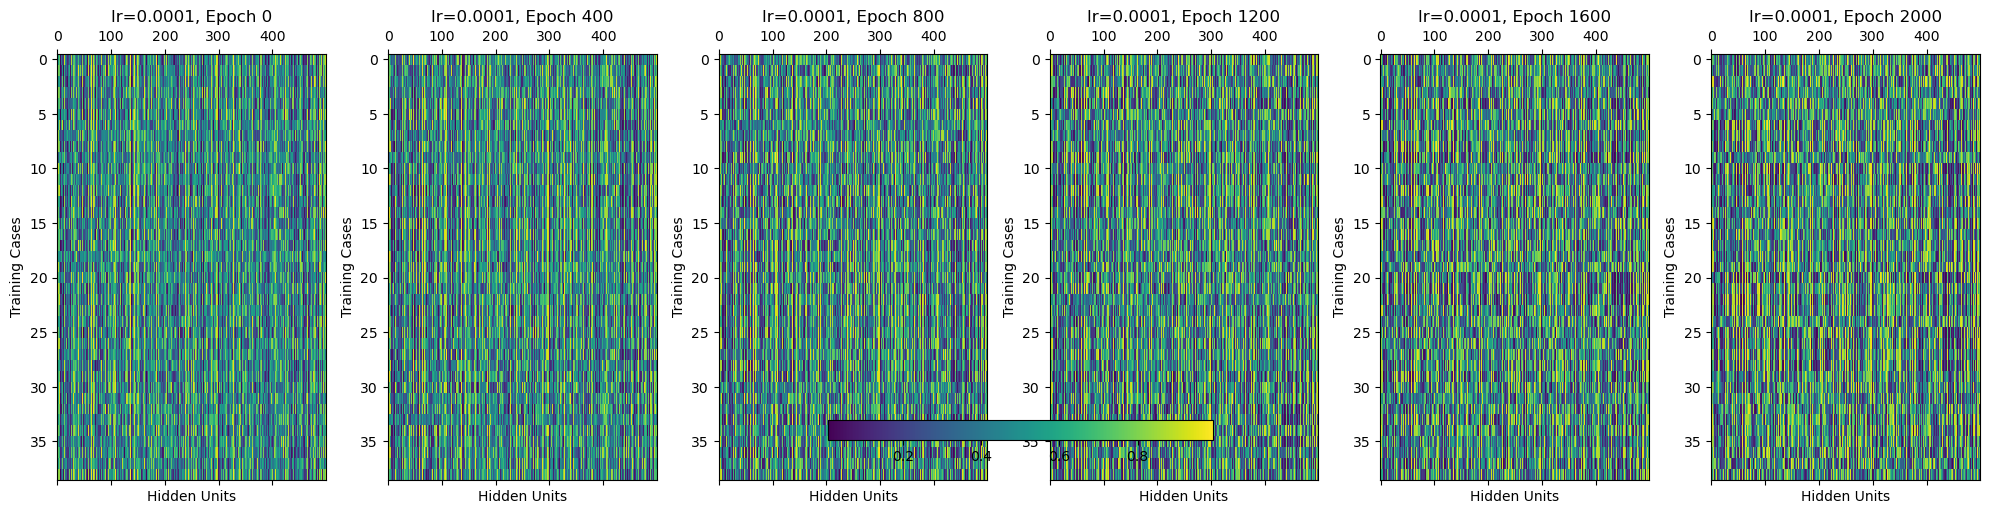

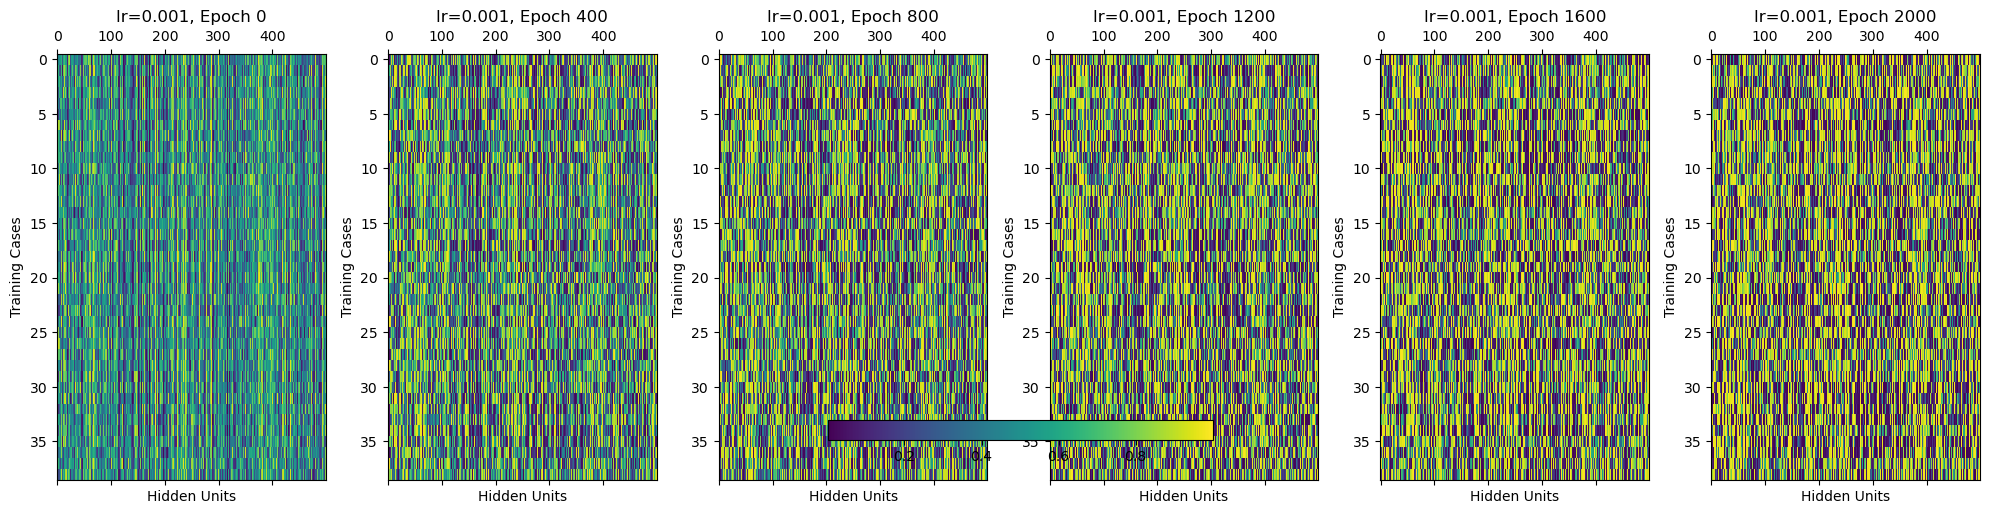

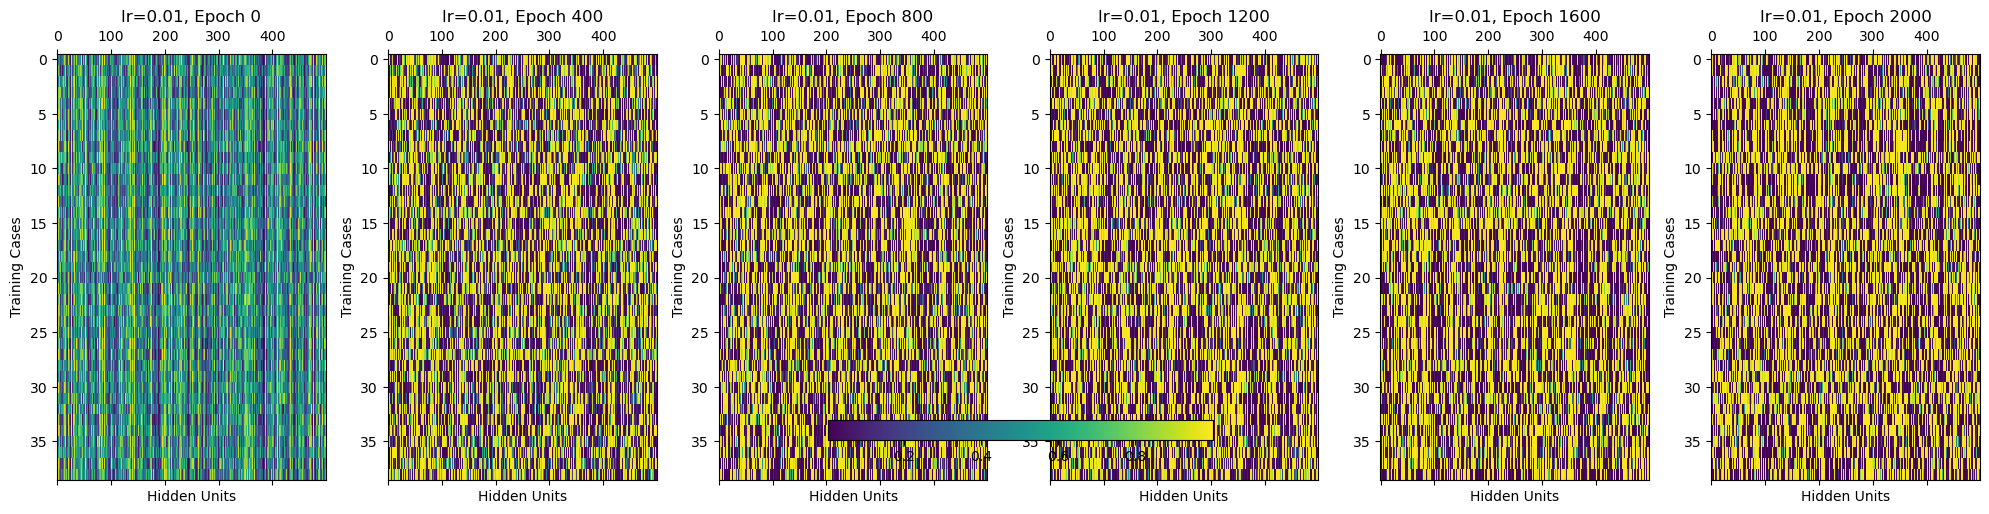

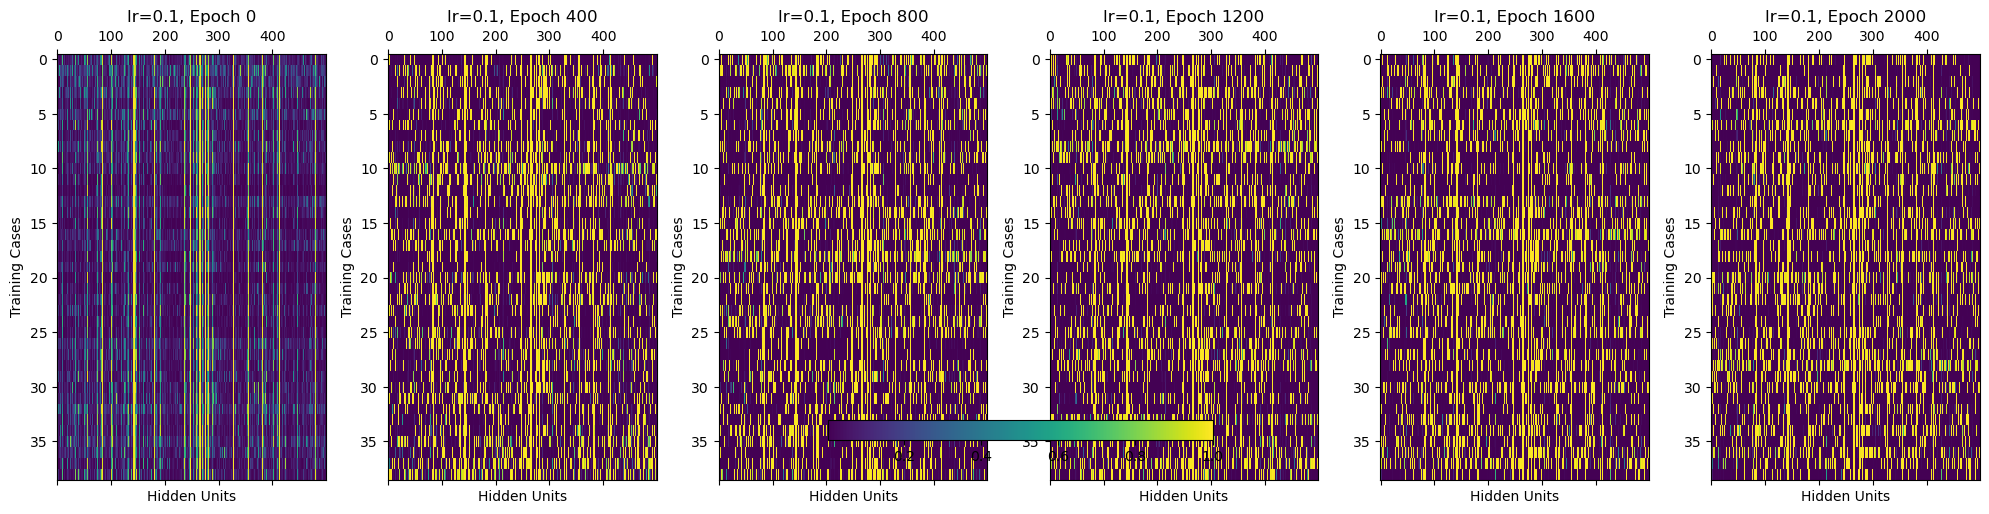

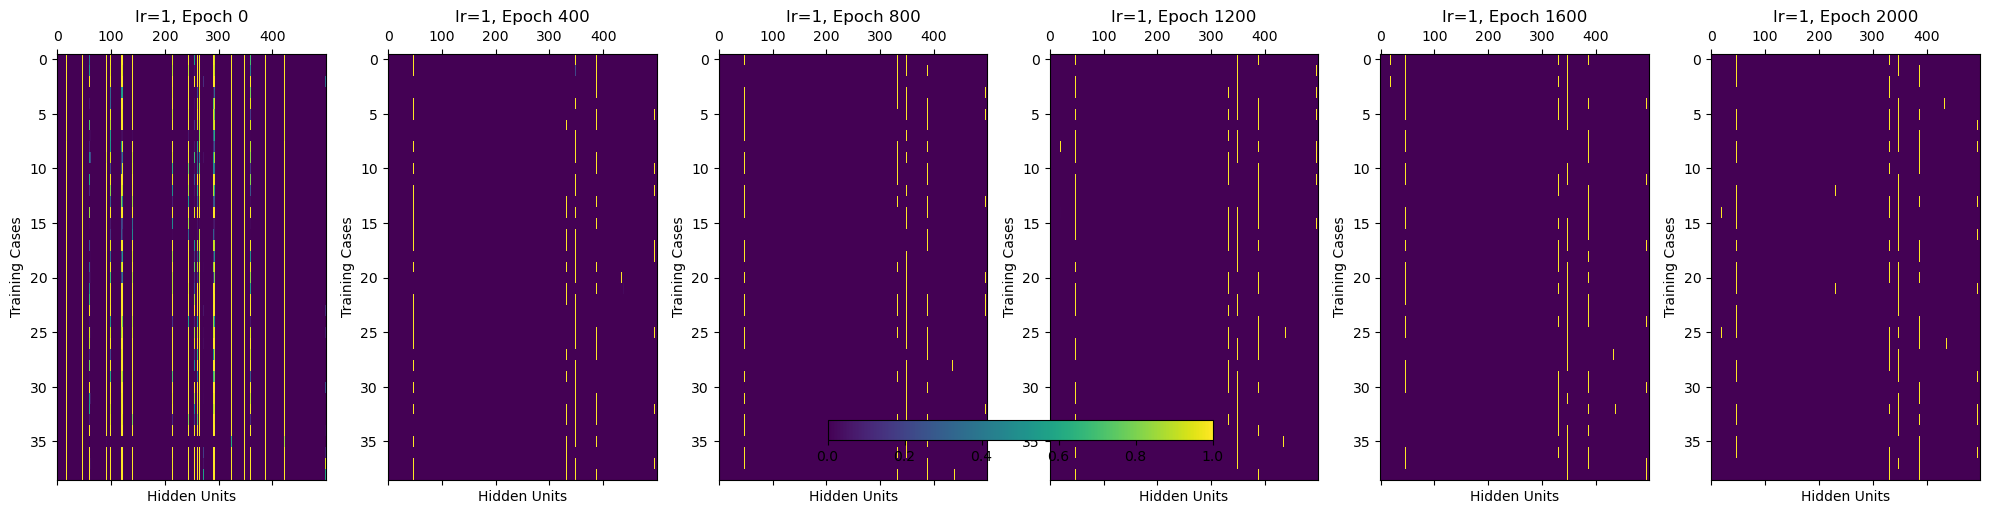

In [142]:
import matplotlib.pyplot as plt

for idx, hidden_probs_snapshots in enumerate(hidden_probs_snapshots_list):
    fig, axs = plt.subplots(1, len(hidden_probs_snapshots), figsize=(20, 5))
    for i, hidden_probs in enumerate(hidden_probs_snapshots):
        cax = axs[i].matshow(hidden_probs, cmap='viridis', aspect='auto')
        axs[i].set_title(f'lr={lr[idx]}, Epoch {i * 400}')
        axs[i].set_xlabel('Hidden Units')
        axs[i].set_ylabel('Training Cases')
    plt.colorbar(cax, ax=axs, orientation='horizontal', fraction=0.05)
    plt.tight_layout()
    plt.show()

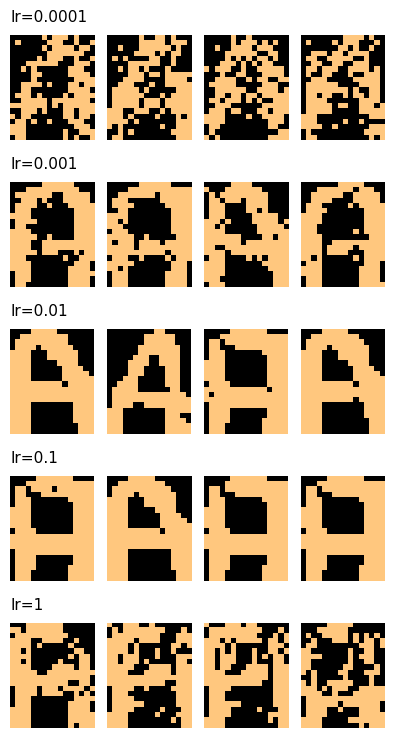

In [140]:
all_images = []
for idx, rbm in enumerate(rbm_list):
    taille_image = get_image_size()
    images = generer_image_RBM(model=rbm, nb_images=4, nb_iter=200, size_img=taille_image)
    all_images.extend(images)  # Use extend to add all images to the list


def plot_images_grid(images, rows, cols, labels, figsize=(5, 9), hspace=0.4, wspace=0.01):
    assert len(images) == rows * cols, "Number of images must match grid dimensions."
    assert len(labels) == rows, "Number of labels must match the number of rows."

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='copper')  # Change colormap as needed
        ax.axis('off')  # Turn off axis

        # Add label to the first column of each row
        if i % cols == 0:
            row_idx = i // cols
            ax.set_title(f'lr={labels[row_idx]}', loc='left', fontsize=11, pad=10)

    plt.subplots_adjust(hspace=hspace, wspace=0)
    plt.show()

plot_images_grid(all_images, rows=5, cols=4, labels=lr)

### Taille du Batch